In [1]:
pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikhailtiurin","key":"f0e47f05df0821ee8d08559769ebe96f"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d olgabelitskaya/flower-color-images

 66% 33.0M/50.1M [00:00<00:00, 141MB/s] 
100% 50.1M/50.1M [00:00<00:00, 162MB/s]


In [7]:
!unzip flower-color-images.zip

Archive:  flower-color-images.zip
  inflating: FlowerColorImages.h5    
  inflating: flower_images/flower_images/0001.png  
  inflating: flower_images/flower_images/0002.png  
  inflating: flower_images/flower_images/0003.png  
  inflating: flower_images/flower_images/0004.png  
  inflating: flower_images/flower_images/0005.png  
  inflating: flower_images/flower_images/0006.png  
  inflating: flower_images/flower_images/0007.png  
  inflating: flower_images/flower_images/0008.png  
  inflating: flower_images/flower_images/0009.png  
  inflating: flower_images/flower_images/0010.png  
  inflating: flower_images/flower_images/0011.png  
  inflating: flower_images/flower_images/0012.png  
  inflating: flower_images/flower_images/0013.png  
  inflating: flower_images/flower_images/0014.png  
  inflating: flower_images/flower_images/0015.png  
  inflating: flower_images/flower_images/0016.png  
  inflating: flower_images/flower_images/0017.png  
  inflating: flower_images/flower_images/001

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten

In [10]:
plt.figure(figsize=(20,20))
test_folder=os.listdir('flowers/flowers')

<Figure size 2000x2000 with 0 Axes>

65536

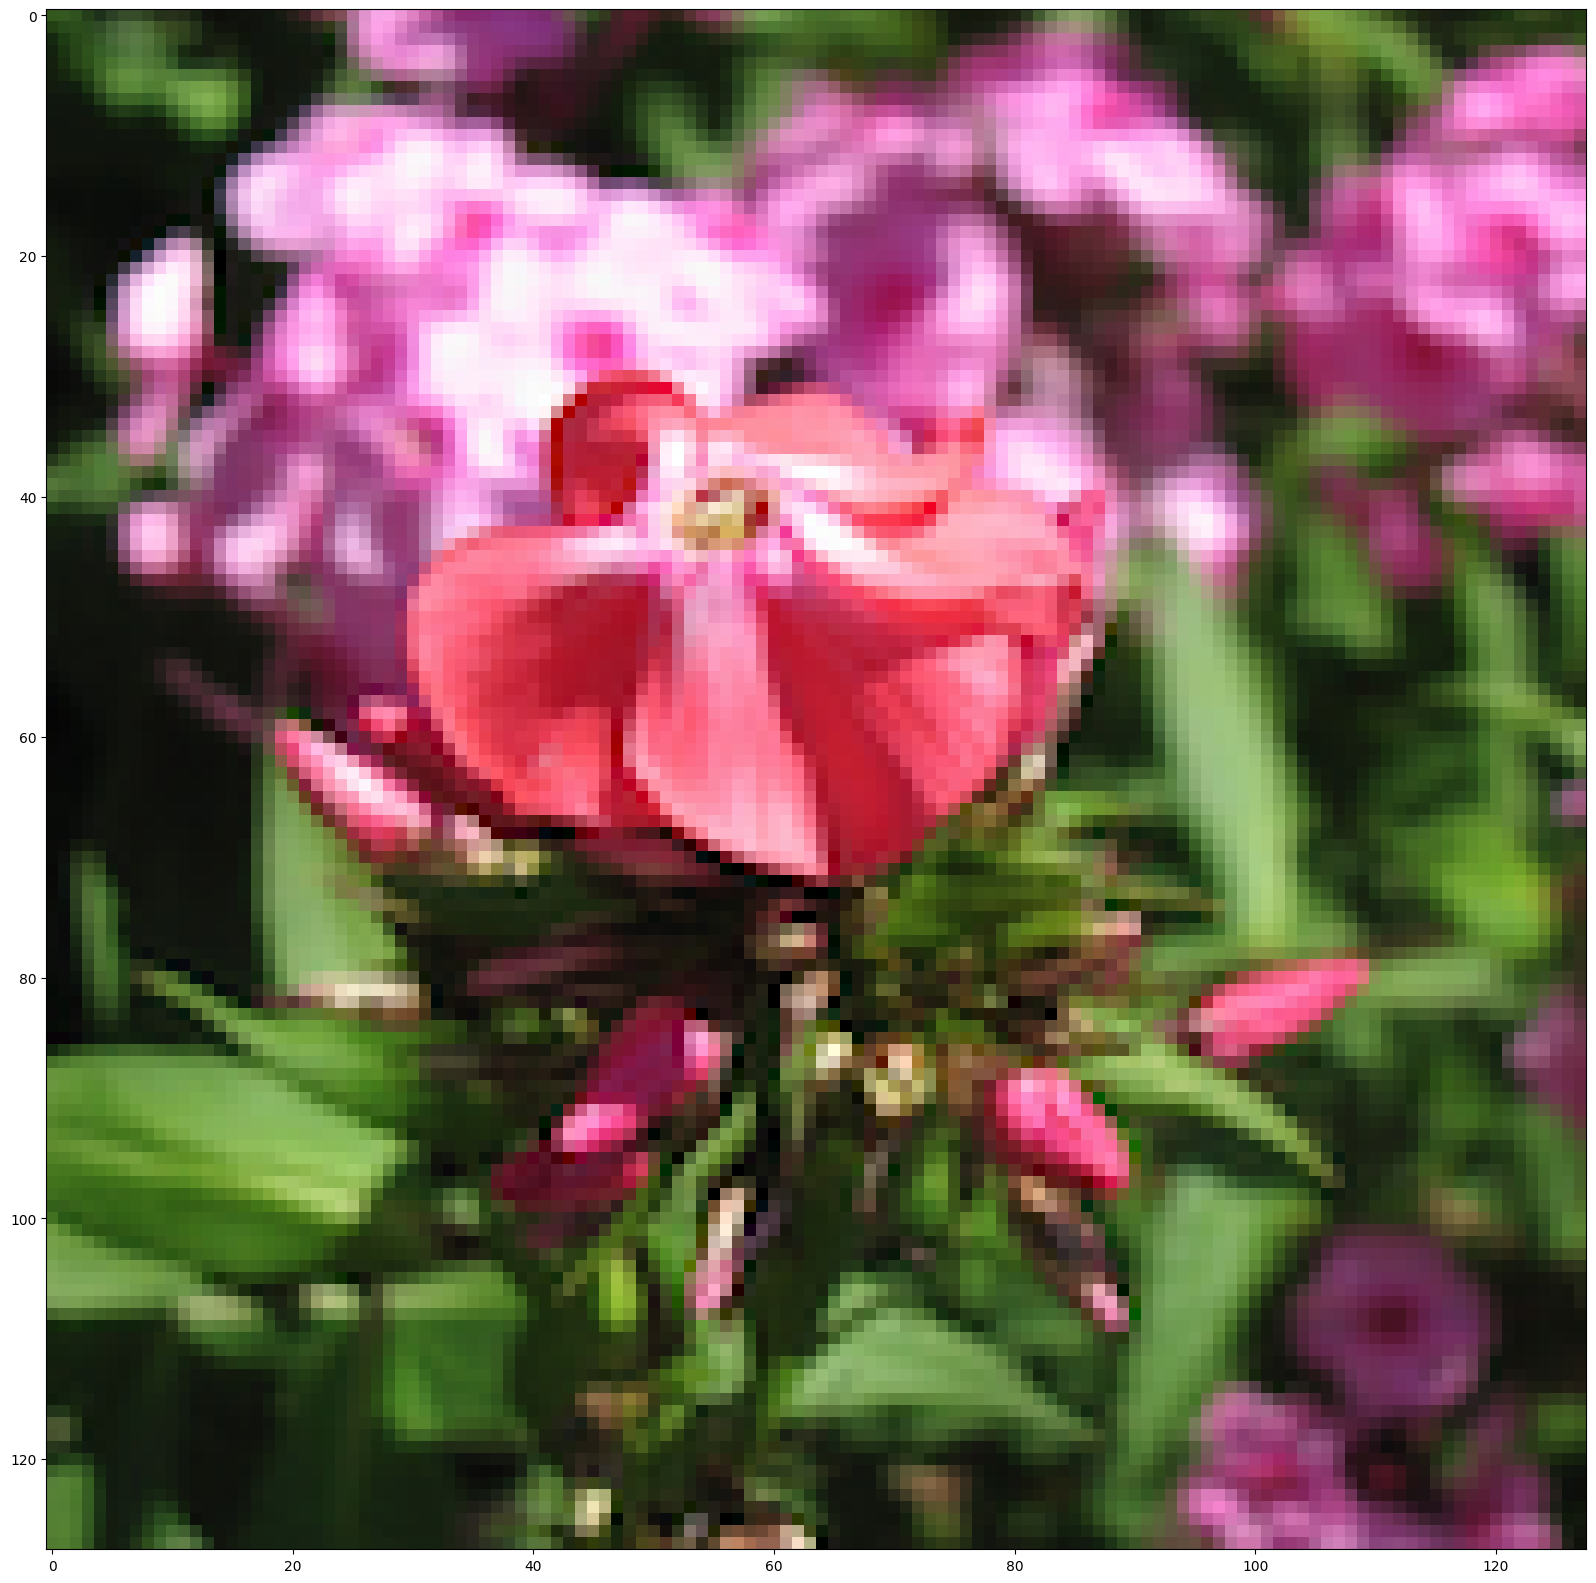

In [43]:
plt.figure(figsize=(20,20))
file = random.choice(os.listdir('flowers/flowers'))
image_path = os.path.join('flowers/flowers', file)
img=mpimg.imread(image_path)
ax.title.set_text(file)
plt.imshow(img)
img.size

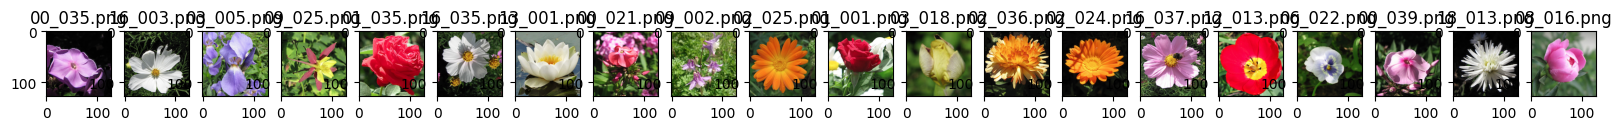

In [17]:
plt.figure(figsize=(20,20))
list_img = []
for i in range(20):
    file = random.choice(os.listdir('flowers/flowers'))
    image_path= os.path.join('flowers/flowers', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,20,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    list_img.append(img)

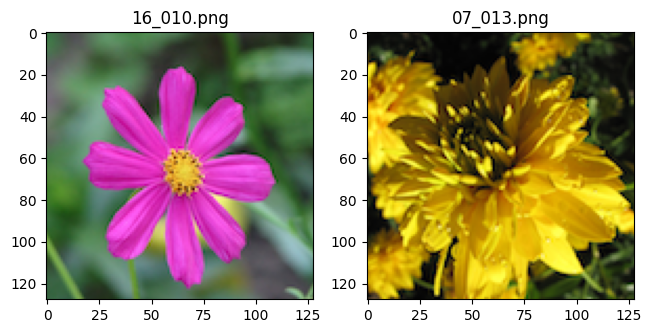

In [19]:
plt.figure(figsize=(20,20))
list_img = []
for i in range(2):
    file = random.choice(os.listdir('flowers/flowers'))
    image_path= os.path.join('flowers/flowers', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    list_img.append(img)

In [21]:
from scipy.ndimage import rotate

def rotate_image_90_degrees(image):
  return rotate(image, 90, reshape=False, mode='nearest')

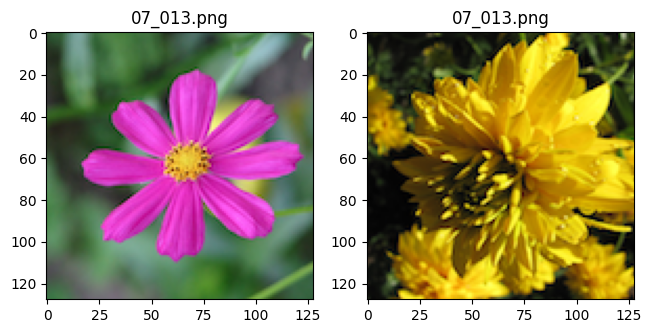

In [29]:
rotated_img = []
for img in list_img:
  rotated_img.append(rotate_image_90_degrees(img))

plt.figure(figsize=(20,20))
for i,img in enumerate(rotated_img):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [23]:
import cv2

def flip_image(image, mode='horizontal'):
    """
    Flip the input image horizontally or vertically.

    Parameters:
    - image: Input image as a numpy array.
    - mode: Mode of flipping, either 'horizontal' or 'vertical'. Default is 'horizontal'.

    Returns:
    - Flipped image as a numpy array.
    """
    if mode == 'horizontal':
        # Flip the image horizontally
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        # Flip the image vertically
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")

    return flipped_image

<Figure size 2000x2000 with 0 Axes>

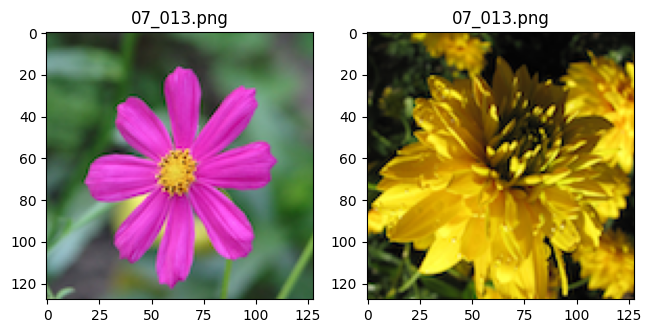

In [28]:
plt.figure(figsize=(20,20))
flipped_horiz = []
flipped_vert = []
for img in list_img:
  flipped_horiz.append(flip_image(img))
for img in list_img:
  flipped_vert.append(flip_image(img,mode= 'vertical'))

plt.figure(figsize=(20,20))
for i,img in enumerate(flipped_horiz):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

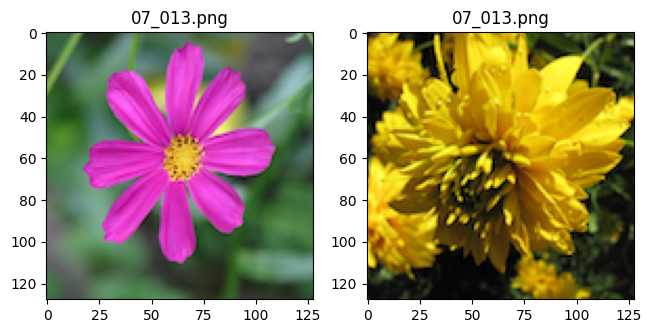

In [31]:
plt.figure(figsize=(20,20))
for i,img in enumerate(flipped_vert):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

TypeError: 'int' object is not callable

In [ ]:
def resize_image(img):
    original_width, original_height = img.size
    new_width = int(original_width * 1.2)
    new_height = int(original_height * 1.2)
    zoomed_image = img.resize((new_width, new_height))
    plt.imshow(zoomed_image)

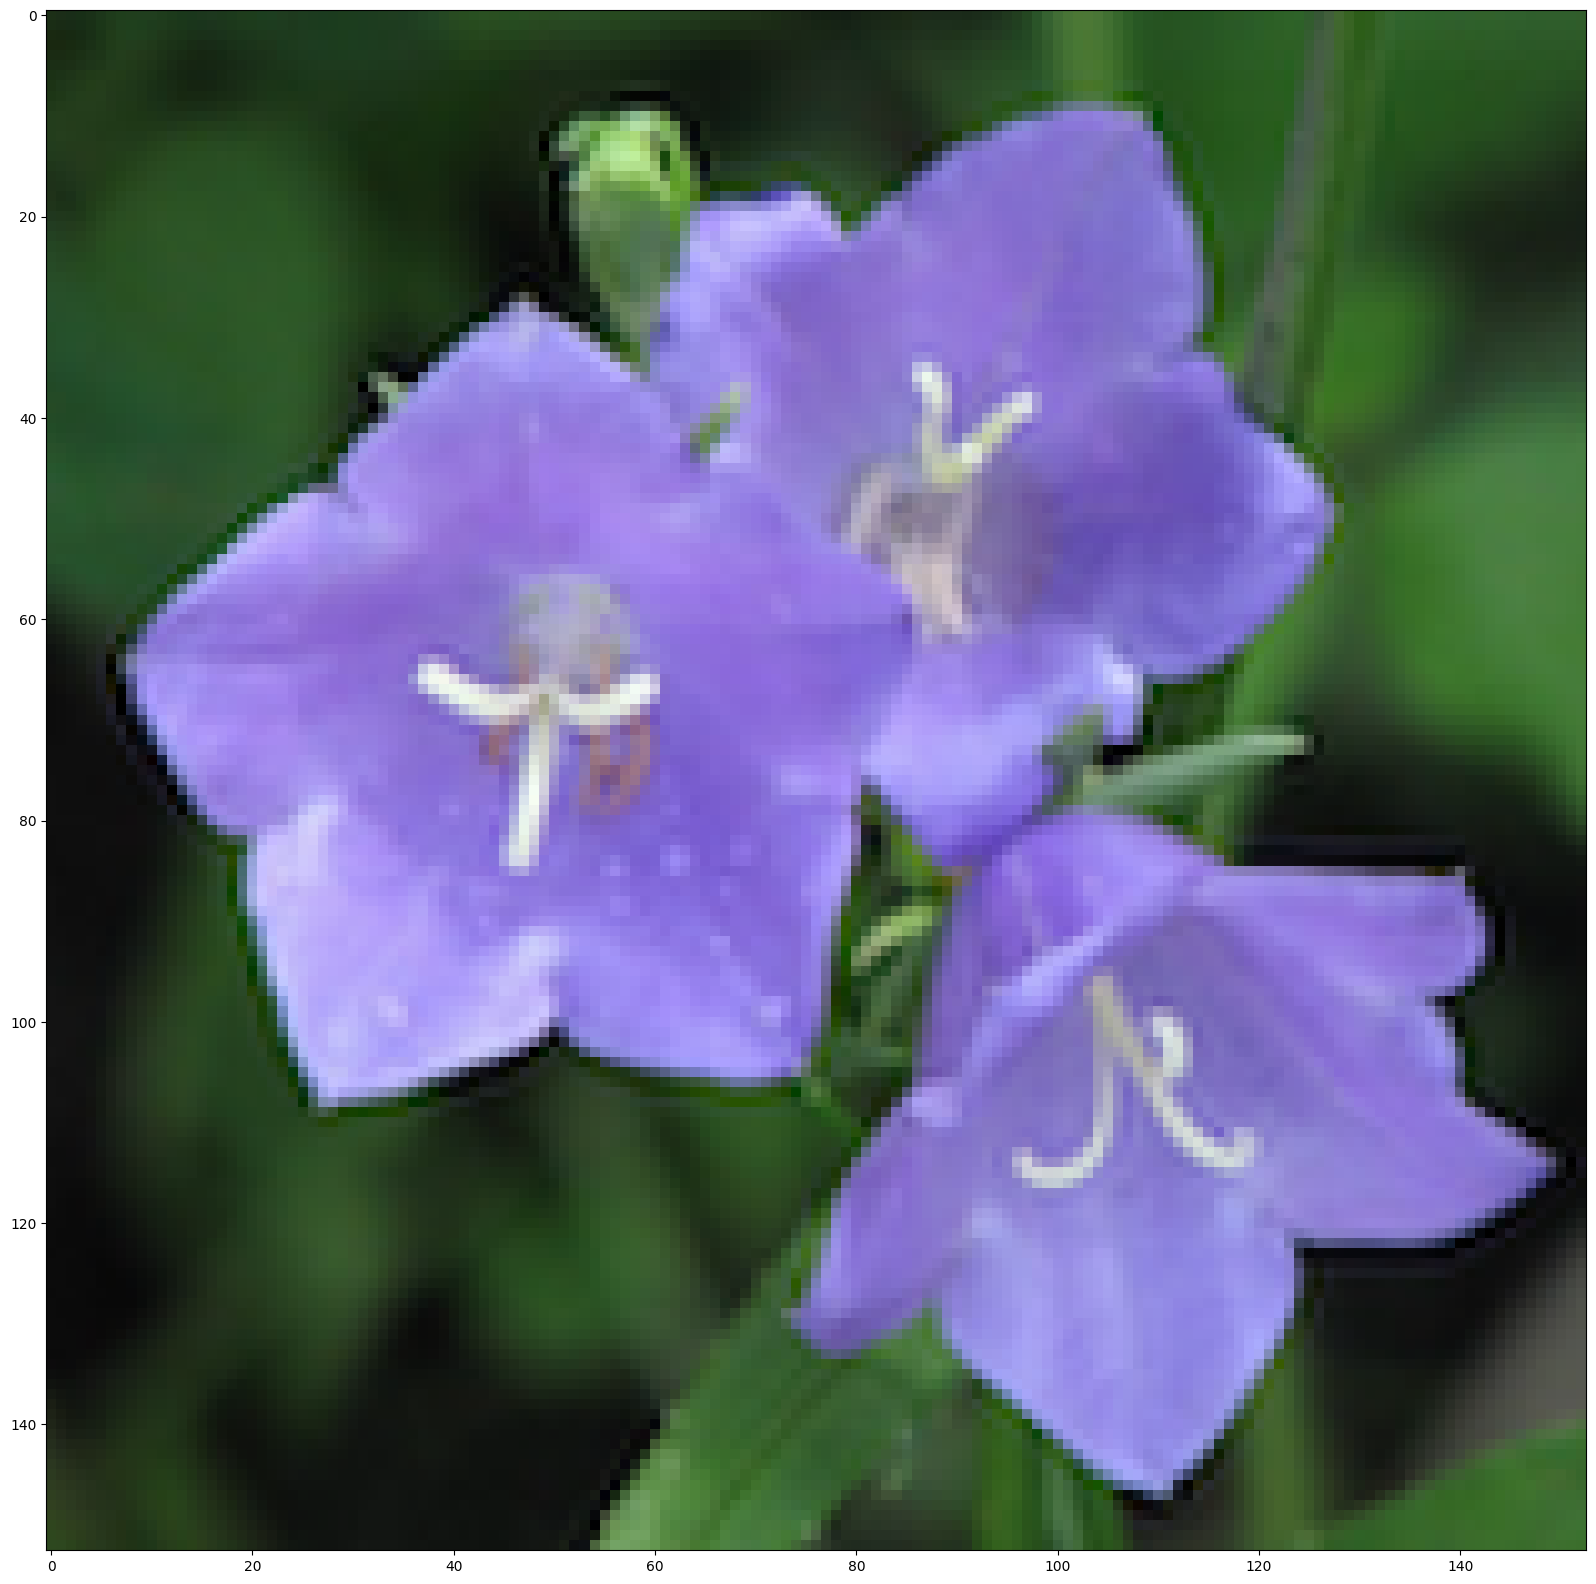

In [46]:
from PIL import Image

def resize_image(img):
    orig_size = img.size
    new_size = tuple(int(dim * 1.2) for dim in orig_size)
    zoomed_image = img.resize(new_size)
    return zoomed_image

plt.figure(figsize=(20, 20))
file = random.choice(os.listdir('flowers/flowers'))
image_path = os.path.join('flowers/flowers', file)
img_res = img
img_res = Image.open(image_path)
ax.title.set_text(file)
zoomed_img = resize_image(img_res)
plt.imshow(zoomed_img)

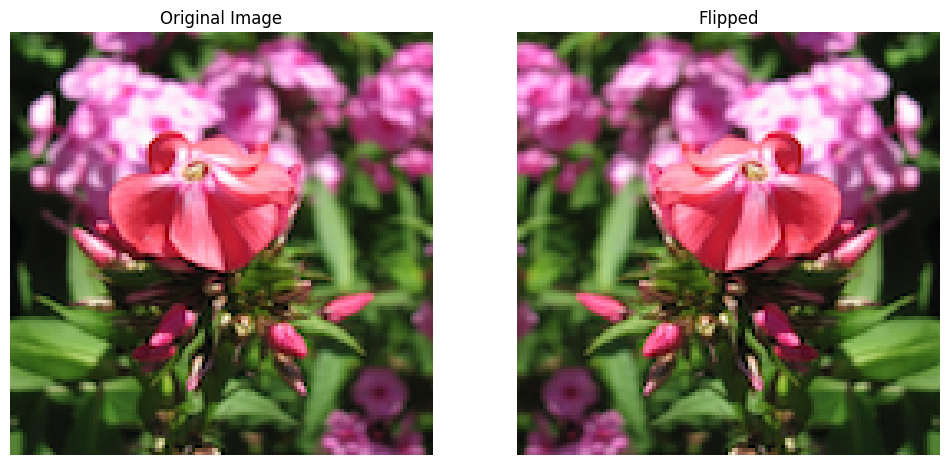

In [49]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def show_images(original, augmented, title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(original)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(flip_image(augmented))
  plt.title(title)
  plt.axis('off')

  plt.show()

show_images(img,img,"Flipped")